# Air Passeneger - Time Series Forcasting


## Auto Regressor + Moving Average (ARIMA)

In this model, we're going to use the Some regression algorithm. 

To visualize the Model, We're going to use Partial Auto Correlation (PACF).

In [123]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sms
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

from datetime import datetime, timedelta

%matplotlib inline

In [2]:
df = pd.read_csv('airline_passengers.csv')

In [3]:
df

,Month,Thousands of Passengers
0,1949-01,112.0
1,1949-02,118.0
2,1949-03,132.0
3,1949-04,129.0
4,1949-05,121.0
...,...,...
140,1960-09,508.0
141,1960-10,461.0
142,1960-11,390.0
143,1960-12,432.0


In [4]:
df.isna().sum()

Month                      0
Thousands of Passengers    1
dtype: int64

In [5]:
df.dropna(axis=0, inplace=True)

In [6]:
df.isna().sum()

Month                      0
Thousands of Passengers    0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Month                    144 non-null    object 
 1   Thousands of Passengers  144 non-null    float64
dtypes: float64(1), object(1)
memory usage: 3.4+ KB


In [9]:
df['Month'] = pd.to_datetime(df['Month'])

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Month                    144 non-null    datetime64[ns]
 1   Thousands of Passengers  144 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 3.4 KB


In [13]:
df.set_index('Month', inplace= True)

In [15]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


<Axes: xlabel='Month'>

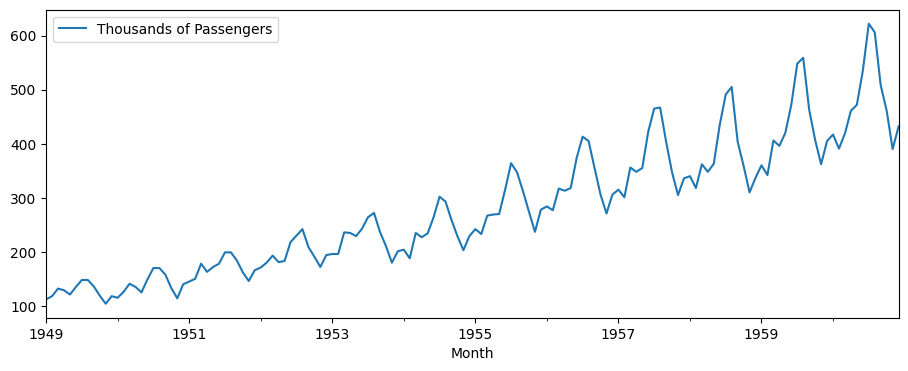

In [17]:
df.plot(figsize=(11, 4))

In [25]:
def adf_test(series):
    result = adfuller(series)
    print('ADF Statistics: {}'.format(result[0]))
    print('P-value: {}'.format(result[0]))
    
    if result[1] <= 0.05:
        print('Strong evidence against the null Hypothesis, reject the null hypothesis. Data has no unit root and is stationary.')
    else:
        print('Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.')


In [26]:
adf_test(df.iloc[:,0])

ADF Statistics: 0.8153688792060441
P-value: 0.8153688792060441
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.


In [27]:
df.head()

,Thousands of Passengers
Month,
1949-01-01,112.0
1949-02-01,118.0
1949-03-01,132.0
1949-04-01,129.0
1949-05-01,121.0


In [29]:
df['Passengers First Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(1)

In [30]:
df.head()

,Thousands of Passengers,Passengers First Difference
Month,,
1949-01-01,112.0,NaN
1949-02-01,118.0,6.0
1949-03-01,132.0,14.0
1949-04-01,129.0,-3.0
1949-05-01,121.0,-8.0


In [32]:
adf_test(df['Passengers First Difference'].dropna())

ADF Statistics: -2.8292668241700034
P-value: -2.8292668241700034
Weak evidence against the null hypothesis, time series has a unit root, indicating it is non-stationary.


In [36]:
### Use techniques Differencing

df['Passengers Second Difference'] = df['Passengers First Difference'] - df['Passengers First Difference'].shift(1)

In [37]:
adf_test(df['Passengers Second Difference'].dropna())

ADF Statistics: -16.38423154246852
P-value: -16.38423154246852
Strong evidence against the null Hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


In [38]:
### 12 Months

df['Passengers 12 Difference'] = df['Thousands of Passengers'] - df['Thousands of Passengers'].shift(12)

In [41]:
adf_test(df['Passengers 12 Difference'].dropna())

ADF Statistics: -3.3830207264924796
P-value: -3.3830207264924796
Strong evidence against the null Hypothesis, reject the null hypothesis. Data has no unit root and is stationary.


### We can find the Q value by using Auto Correlation (ACF), Moving Average MA. 

##### The main work is to find the P, Q, d.

        P - Probablity
      
        Q - Coefficients
        
        d - Difference value

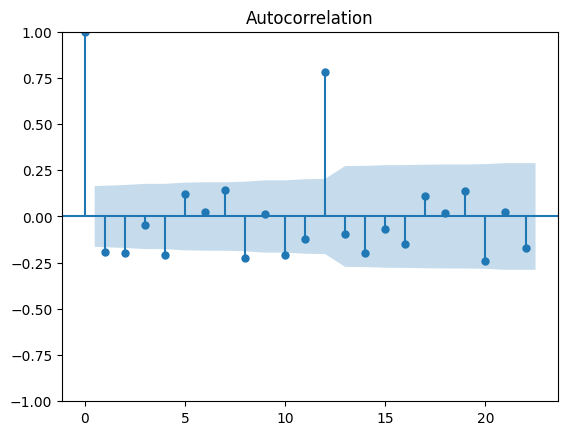

In [44]:
result_acf = plot_acf(df['Passengers Second Difference'].dropna())

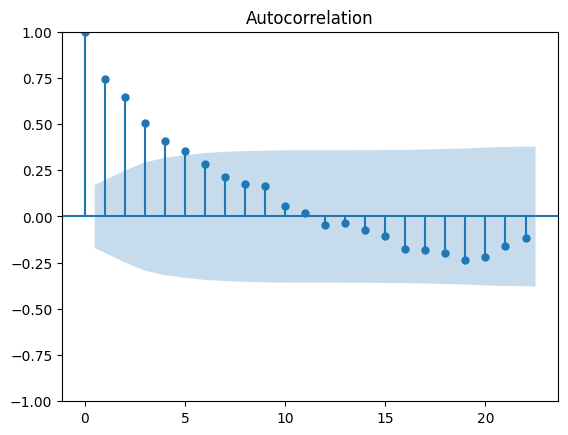

In [46]:
acf12 = plot_acf(df['Passengers 12 Difference'].dropna())

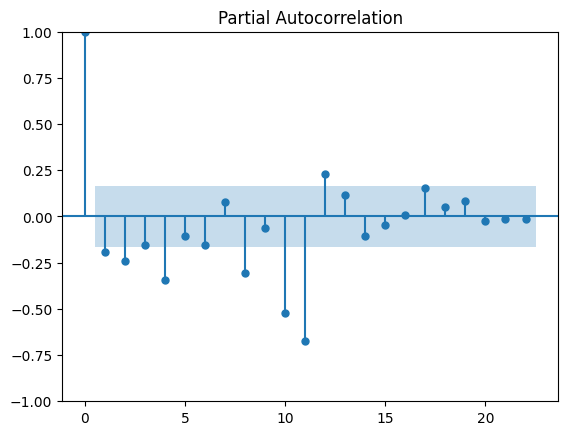

In [45]:
result_pacf = plot_pacf(df['Passengers Second Difference'].dropna())

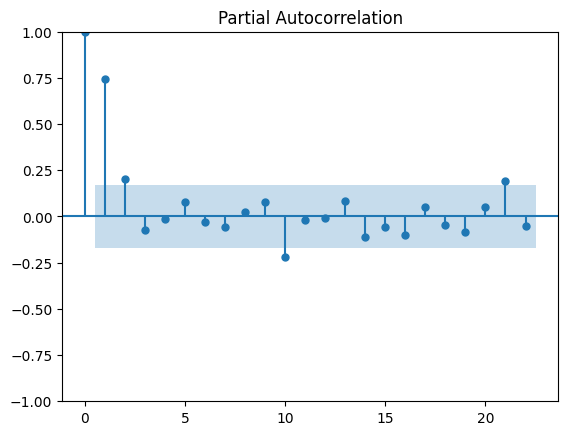

In [47]:
result_pacf12 = plot_pacf(df['Passengers 12 Difference'].dropna())

In [48]:
df

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1960-08-01,606.0,-16.0,-103.0,47.0
1960-09-01,508.0,-98.0,-82.0,45.0
1960-10-01,461.0,-47.0,51.0,54.0


In [52]:
train_dataset_end = datetime(1955, 12, 1)
test_dataset_end = datetime(1960, 12, 1)

In [53]:
train_data = df[:train_dataset_end]
test_data = df[train_dataset_end + timedelta(days=1):test_dataset_end]

In [54]:
## Predictions

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

In [55]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1956-01-01,284.0,6.0,-35.0,42.0
1956-02-01,277.0,-7.0,-13.0,44.0
1956-03-01,317.0,40.0,47.0,50.0
1956-04-01,313.0,-4.0,-44.0,44.0
1956-05-01,318.0,5.0,9.0,48.0
1956-06-01,374.0,56.0,51.0,59.0
1956-07-01,413.0,39.0,-17.0,49.0
1956-08-01,405.0,-8.0,-47.0,58.0
1956-09-01,355.0,-50.0,-42.0,43.0


## Create an ARIMA model

    -- ARIMA will work with Stock Data.
    
    -- ARIMA is not giving a good result for the Seasonal data.

In [57]:
train_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference
Month,,,,
1949-01-01,112.0,NaN,NaN,NaN
1949-02-01,118.0,6.0,NaN,NaN
1949-03-01,132.0,14.0,8.0,NaN
1949-04-01,129.0,-3.0,-17.0,NaN
1949-05-01,121.0,-8.0,-5.0,NaN
...,...,...,...,...
1955-08-01,347.0,-17.0,-66.0,54.0
1955-09-01,312.0,-35.0,-18.0,53.0
1955-10-01,274.0,-38.0,-3.0,45.0


In [71]:
model_ARIMA = ARIMA(train_data['Thousands of Passengers'], order=(10,2,0))

C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [72]:
model_arima_fit = model_ARIMA.fit()

In [73]:
model_arima_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                  SARIMAX Results                                  
===================================================================================
Dep. Variable:     Thousands of Passengers   No. Observations:                   84
Model:                     ARIMA(10, 2, 0)   Log Likelihood                -357.239
Date:                     Thu, 15 Aug 2024   AIC                            736.477
Time:                             18:08:38   BIC                            762.951
Sample:                         01-01-1949   HQIC                           747.106
                              - 12-01-1955                                         
Covariance Type:                       opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5166      0.121     -4.262      0.000      -0.754      -0.279
ar.L2         -0.7204      0.121     -5.940      0.000      -0.958      -0.483
ar.L3         -0.4857      0.125     -3.876      0.000      -0.731      -0.240
ar.L4         -0.7505      0.129     -5.819      0.000      -1.003      -0.498
ar.L5         -0.5062      0.169     -2.991      0.003      -0.838      -0.175
ar.L6         -0.5200      0.141     -3.683      0.000      -0.797      -0.243
ar.L7         -0.3051      0.143     -2.127      0.033      -0.586      -0.024
ar.L8         -0.5939      0.155     -3.833      0.000      -0.898      -0.290
ar.L9         -0.2963      0.132     -2.241      0.025      -0.555      -0.037
ar.L10        -0.4825      0.110     -4.376      0.000      -0.699      -0.266
sigma2       336.0939     66.064      5.087      0.000     206.612     465.576
===================================================================================
Ljung-Box (L1) (Q):                  10.86   Jarque-Bera (JB):                 1.24
Prob(Q):                              0.00   Prob(JB):                         0.54
Heteroskedasticity (H):               2.85   Skew:                             0.24
Prob(H) (two-sided):                  0.01   Kurtosis:                         2.64
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [74]:
### Prediction

pred_start_date = test_data.index[0]
pred_end_date = test_data.index[-1]

print(pred_start_date)
print(pred_end_date)

1956-01-01 00:00:00
1960-12-01 00:00:00


In [81]:
pred = model_arima_fit.predict(start=pred_start_date, end=pred_end_date)
pred

1956-01-01    300.183613
1956-02-01    309.478356
1956-03-01    316.443015
1956-04-01    307.827545
1956-05-01    318.544234
1956-06-01    348.922084
1956-07-01    366.020289
1956-08-01    346.567535
1956-09-01    332.120969
1956-10-01    307.734755
1956-11-01    311.623912
1956-12-01    339.828198
1957-01-01    349.840408
1957-02-01    356.098236
1957-03-01    350.687829
1957-04-01    350.080465
1957-05-01    361.157696
1957-06-01    381.216519
1957-07-01    382.319377
1957-08-01    372.852582
1957-09-01    364.110098
1957-10-01    356.108927
1957-11-01    371.293792
1957-12-01    385.323599
1958-01-01    392.077841
1958-02-01    391.405854
1958-03-01    388.404584
1958-04-01    391.572861
1958-05-01    402.448084
1958-06-01    413.255689
1958-07-01    410.853420
1958-08-01    407.670547
1958-09-01    402.486339
1958-10-01    406.089151
1958-11-01    418.125318
1958-12-01    426.012380
1959-01-01    429.205586
1959-02-01    427.352237
1959-03-01    428.150993
1959-04-01    432.790853


In [82]:
residuals = test_data['Thousands of Passengers'] - pred
residuals

Month
1956-01-01    -16.183613
1956-02-01    -32.478356
1956-03-01      0.556985
1956-04-01      5.172455
1956-05-01     -0.544234
1956-06-01     25.077916
1956-07-01     46.979711
1956-08-01     58.432465
1956-09-01     22.879031
1956-10-01     -1.734755
1956-11-01    -40.623912
1956-12-01    -33.828198
1957-01-01    -34.840408
1957-02-01    -55.098236
1957-03-01      5.312171
1957-04-01     -2.080465
1957-05-01     -6.157696
1957-06-01     40.783481
1957-07-01     82.680623
1957-08-01     94.147418
1957-09-01     39.889902
1957-10-01     -9.108927
1957-11-01    -66.293792
1957-12-01    -49.323599
1958-01-01    -52.077841
1958-02-01    -73.405854
1958-03-01    -26.404584
1958-04-01    -43.572861
1958-05-01    -39.448084
1958-06-01     21.744311
1958-07-01     80.146580
1958-08-01     97.329453
1958-09-01      1.513661
1958-10-01    -47.089151
1958-11-01   -108.125318
1958-12-01    -89.012380
1959-01-01    -69.205586
1959-02-01    -85.352237
1959-03-01    -22.150993
1959-04-01    -36.7

<Axes: ylabel='Density'>

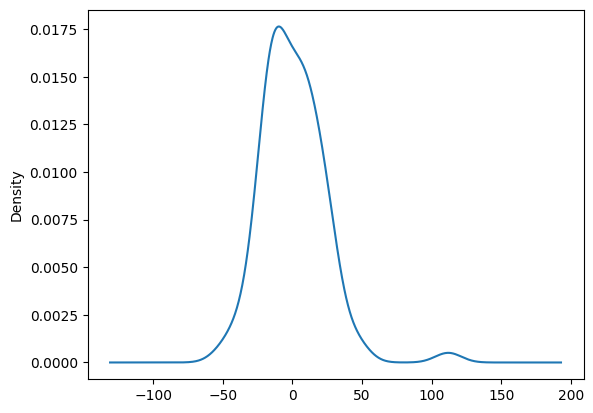

In [83]:
model_arima_fit.resid.plot(kind='kde')

In [84]:
test_data['Predicted_ARIMA'] = pred

C:\Users\johan\AppData\Local\Temp\ipykernel_15812\284031954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_ARIMA'] = pred


<Axes: xlabel='Month'>

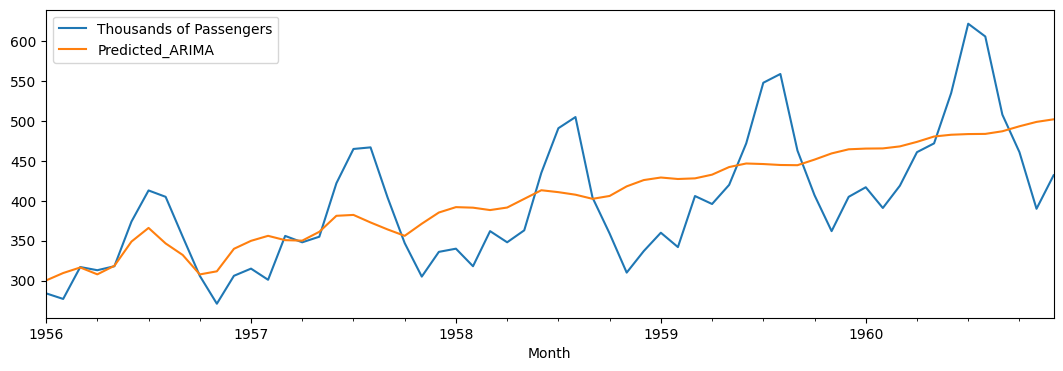

In [85]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA']].plot(figsize=(13, 4))

## SARIMAX Model

This model works well in the Seasonal data.

In [94]:
model_SARIMAX = SARIMAX(train_data['Thousands of Passengers'], order=(3, 0, 5), seasonal_order = (0, 1, 0, 12))

C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


In [95]:
model_SARIMAX_fit = model_SARIMAX.fit()

C:\Users\johan\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [96]:
model_SARIMAX_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:             Thousands of Passengers   No. Observations:                   84
Model:             SARIMAX(3, 0, 5)x(0, 1, [], 12)   Log Likelihood                -265.240
Date:                             Thu, 15 Aug 2024   AIC                            548.481
Time:                                     18:33:54   BIC                            568.971
Sample:                                 01-01-1949   HQIC                           556.638
                                      - 12-01-1955                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5983      0.938      0.638      0.523      -1.240       2.436
ar.L2          0.8311      0.232      3.581      0.000       0.376       1.286
ar.L3         -0.4525      0.894     -0.506      0.613      -2.205       1.300
ma.L1          0.1837      1.164      0.158      0.875      -2.099       2.466
ma.L2         -0.5342      1.262     -0.423      0.672      -3.008       1.940
ma.L3         -0.0986      0.384     -0.257      0.797      -0.852       0.654
ma.L4         -0.1273      0.337     -0.377      0.706      -0.789       0.534
ma.L5          0.2471      0.357      0.693      0.489      -0.452       0.946
sigma2        87.7320     81.155      1.081      0.280     -71.330     246.794
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 2.68
Prob(Q):                              0.88   Prob(JB):                         0.26
Heteroskedasticity (H):               2.05   Skew:                             0.46
Prob(H) (two-sided):                  0.09   Kurtosis:                         2.77
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [116]:
pred_sarimax = model_SARIMAX_fit.predict(start = pred_start_date, end=datetime(1960, 12, 1))
pred_sarimax

1956-01-01    286.185180
1956-02-01    281.277526
1956-03-01    309.916898
1956-04-01    310.677155
1956-05-01    311.335162
1956-06-01    354.949991
1956-07-01    403.397984
1956-08-01    385.071199
1956-09-01    349.445390
1956-10-01    310.218013
1956-11-01    272.563924
1956-12-01    312.435646
1957-01-01    319.957540
1957-02-01    314.011268
1957-03-01    341.988511
1957-04-01    341.789524
1957-05-01    341.793280
1957-06-01    384.519028
1957-07-01    432.325377
1957-08-01    413.171802
1957-09-01    376.920349
1957-10-01    336.921824
1957-11-01    298.660489
1957-12-01    337.811077
1958-01-01    344.745764
1958-02-01    338.123588
1958-03-01    365.534708
1958-04-01    364.700958
1958-05-01    364.160263
1958-06-01    406.288865
1958-07-01    453.572665
1958-08-01    433.856508
1958-09-01    397.104366
1958-10-01    356.575154
1958-11-01    317.834742
1958-12-01    356.484191
1959-01-01    362.961008
1959-02-01    355.865161
1959-03-01    382.839100
1959-04-01    381.557289


In [117]:
residuals_sarimax = test_data['Thousands of Passengers'] - pred_sarimax
residuals_sarimax

Month
1956-01-01     -2.185180
1956-02-01     -4.277526
1956-03-01      7.083102
1956-04-01      2.322845
1956-05-01      6.664838
1956-06-01     19.050009
1956-07-01      9.602016
1956-08-01     19.928801
1956-09-01      5.554610
1956-10-01     -4.218013
1956-11-01     -1.563924
1956-12-01     -6.435646
1957-01-01     -4.957540
1957-02-01    -13.011268
1957-03-01     14.011489
1957-04-01      6.210476
1957-05-01     13.206720
1957-06-01     37.480972
1957-07-01     32.674623
1957-08-01     53.828198
1957-09-01     27.079651
1957-10-01     10.078176
1957-11-01      6.339511
1957-12-01     -1.811077
1958-01-01     -4.745764
1958-02-01    -20.123588
1958-03-01     -3.534708
1958-04-01    -16.700958
1958-05-01     -1.160263
1958-06-01     28.711135
1958-07-01     37.427335
1958-08-01     71.143492
1958-09-01      6.895634
1958-10-01      2.424846
1958-11-01     -7.834742
1958-12-01    -19.484191
1959-01-01     -2.961008
1959-02-01    -13.865161
1959-03-01     23.160900
1959-04-01     14.4

<Axes: xlabel='Month'>

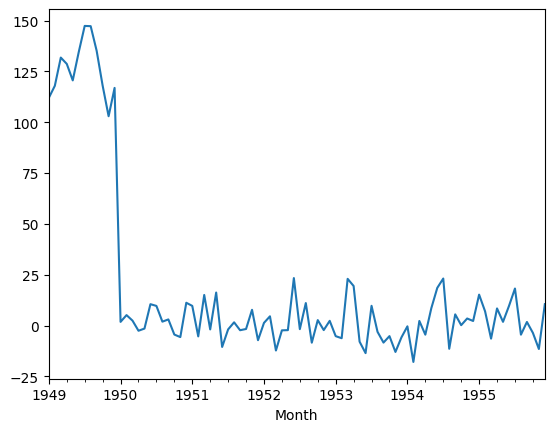

In [118]:
model_SARIMAX_fit.resid.plot()

<Axes: ylabel='Density'>

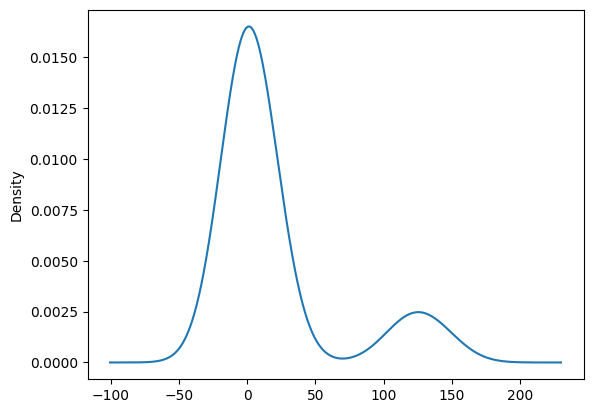

In [119]:
model_SARIMAX_fit.resid.plot(kind='kde')

In [120]:
test_data['Predicted_SARIMAX'] = pred_sarimax

C:\Users\johan\AppData\Local\Temp\ipykernel_15812\2646301213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Predicted_SARIMAX'] = pred_sarimax


In [121]:
test_data

,Thousands of Passengers,Passengers First Difference,Passengers Second Difference,Passengers 12 Difference,Predicted_ARIMA,Predicted_SARIMAX
Month,,,,,,
1956-01-01,284.0,6.0,-35.0,42.0,300.183613,286.185180
1956-02-01,277.0,-7.0,-13.0,44.0,309.478356,281.277526
1956-03-01,317.0,40.0,47.0,50.0,316.443015,309.916898
1956-04-01,313.0,-4.0,-44.0,44.0,307.827545,310.677155
1956-05-01,318.0,5.0,9.0,48.0,318.544234,311.335162
1956-06-01,374.0,56.0,51.0,59.0,348.922084,354.949991
1956-07-01,413.0,39.0,-17.0,49.0,366.020289,403.397984
1956-08-01,405.0,-8.0,-47.0,58.0,346.567535,385.071199
1956-09-01,355.0,-50.0,-42.0,43.0,332.120969,349.445390


<Axes: xlabel='Month'>

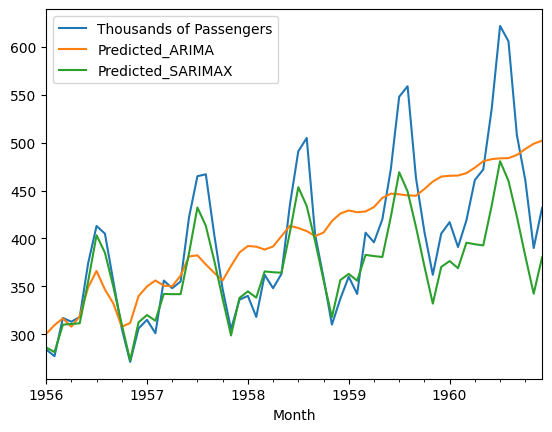

In [122]:
test_data[['Thousands of Passengers', 'Predicted_ARIMA', 'Predicted_SARIMAX']].plot()